# Homework # 4 Naive BAYES Classifier

### Instructor - Dr. Uma Gajendragadkar

### Problem - Design and develop Machine learning model to predict Diabetes using Naive Bayes Algorithm. 

### Dataset - Diabetes dataset

This dataset consists of 768 observations & 8 numerical independent variables.
Dependent and target variable is OUTCOME. 1 means diabetes test result being positive, 0 means indicates negative.

Pregnancies: Number of Times Being Pregnant

Glucose: Plasma Glucose Concentration (a 2 hours in an oral glucose tolerance test)

BloodPressure: Diastolic Blood Pressure (mm Hg)

SkinThickness: Triceps Skin Fold Thickness (mm)

Insulin: 2-Hour Serum Insulin (mu U/ml)

BMI: Body Mass Index (weight in kg/(height in m)^2)

DiabetesPedigreeFunction: Diabetes Pedigree Function

Age: Age

Outcome: Class variable ( 0 - 1)



In [5]:
## Homework 3 : Bayes Theorem
### Instructor - Dr. Uma Gajendragadkar

### Student - Huy Le

### Problem
### Design and develop Machine learning model to predict Diabetes
### using Naive Bayes Algorithm. Diabetes is a chronic disease that
### affects the way the body processes blood sugar,
### also known as glucose.

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_validate
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot  as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB

Step 1 - Write code to Read data from dataset into pandas dataframe

In [7]:
file_path = "diabetes.csv"
df = pd.read_csv(file_path)

Step 2 - a) Write code to display dataset info 
b) Print 10 rows from dataset.

In [8]:
# Step 2a)
df.info()

# Step 2b)
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1
5,5,116,74,0,0,25.600,0.201,30,0
6,3,78,50,32,88,31.000,0.248,26,1
7,10,115,0,0,0,35.300,0.134,29,0
8,2,197,70,45,543,30.500,0.158,53,1
9,8,125,96,0,0,0.000,0.232,54,1


Step 3 - Write code to remove Pregnancy column 

In [9]:
df = df.drop(columns=["Pregnancies"])

Step 4 - Write code to display info of dataset and check shape of dataset.

In [10]:
# Display info
df.info()

# Check the shape of dataset
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB
(768, 8)


Step 5 - Write code to clean data

In [11]:
# Replace zero values with NaN
cols_with_zero_values = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

df[cols_with_zero_values] = df[cols_with_zero_values].replace(0, np.nan)

Step 6 - Split data into training and testing sets ( 80: 20 ratio)

In [14]:
x = df.drop("Outcome", axis=1)
y = df["Outcome"]

# Split the dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size=0.2,
    random_state=42
)

# Check the sizes
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

# Double-check the 80:20 split
total = len(df)

train_pct = len(X_train) / total * 100
test_pct  = len(X_test) / total * 100

print(f"Training set: {train_pct:.2f}%")
print(f"Testing set: {test_pct:.2f}%")

Training set shape: (614, 7)
Testing set shape: (154, 7)
Training set: 79.95%
Testing set: 20.05%


#### **Step #7: Initialize your model**




In [18]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()

#### **Step #8: Fit your model, test on the testing data, and create a visualization if applicable**

In [21]:
print("Missing values in X_train:\n", X_train.isnull().sum())
print("Missing values in X_test:\n", X_test.isnull().sum())

Missing values in X_train:
 Glucose                       5
BloodPressure                24
SkinThickness               176
Insulin                     290
BMI                           7
DiabetesPedigreeFunction      0
Age                           0
dtype: int64
Missing values in X_test:
 Glucose                      0
BloodPressure               11
SkinThickness               51
Insulin                     84
BMI                          4
DiabetesPedigreeFunction     0
Age                          0
dtype: int64


In [26]:
from sklearn.impute import SimpleImputer

# Fill missing values
imputer = SimpleImputer(strategy="median")

X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [27]:
nb_model.fit(X_train, y_train)

GaussianNB()

Step 9 - Predict using model on test data

In [28]:
y_pred = nb_model.predict(X_test)

Step 10 -  Find accuracy of model

In [29]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.7597402597402597


Step 11 - Confusion Matrix

In [30]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[81 18]
 [19 36]]


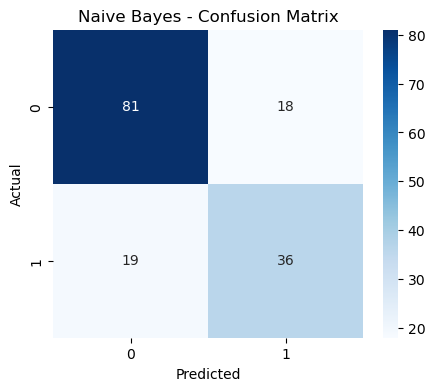

In [31]:
# Visualize the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Naive Bayes - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()